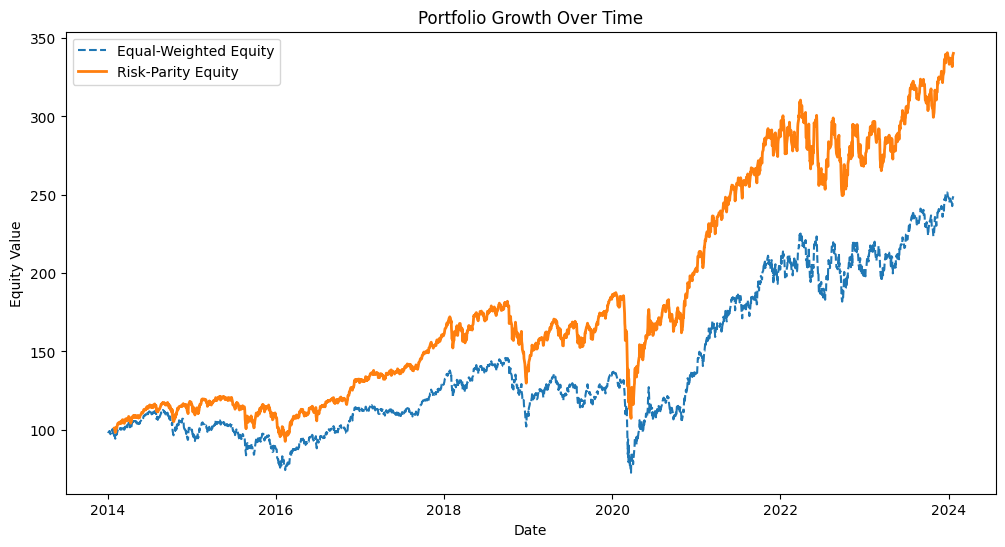

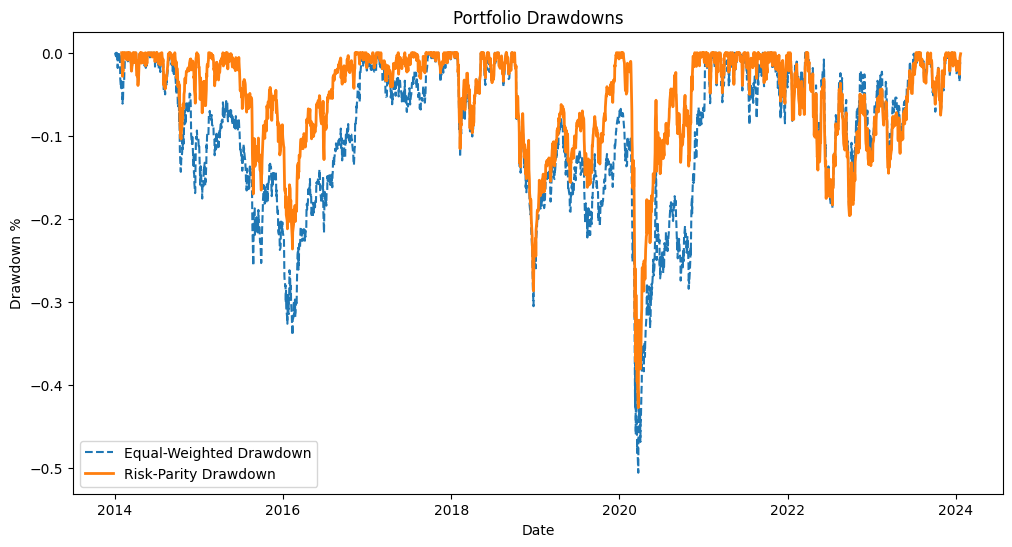

,Date,Adj_Close_XLF,Adj_Close_XOP,Adj_Close_XLK,Return_XLF,Return_XOP,Return_XLK,EQ_Combo_Return,XLF_Vol,XOP_Vol,XLK_Vol,XLF_Weight,XOP_Weight,XLK_Weight,Risk_Parity_Return,EQ_Equity,Risk_Parity_Equity,Peak,EQ_Drawdown,Risk_Parity_Drawdown
0,2013-12-31,14.642447,232.098801,31.194309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-01-02,14.562061,227.289642,30.888836,-0.005490,-0.020720,-0.009793,-0.012001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.799906,NaN,NaN,0.000000,NaN
2,2014-01-03,14.662540,225.223648,30.740461,0.006900,-0.009090,-0.004804,-0.002331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.569598,NaN,NaN,-0.002331,NaN
3,2014-01-06,14.675934,224.004364,30.688086,0.000913,-0.005414,-0.001704,-0.002068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.365758,NaN,NaN,-0.004394,NaN
4,2014-01-07,14.682631,226.070404,30.967379,0.000456,0.009223,0.009101,0.006260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.981546,NaN,NaN,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2526,2024-01-16,37.340000,129.639999,192.720001,-0.006915,-0.030729,0.002497,-0.011716,0.006636,0.013303,0.010297,0.466585,0.232730,0.300685,-0.009627,244.254548,333.469021,340.692094,-0.028765,-0.021201
2527,2024-01-17,37.270000,128.160004,191.770004,-0.001875,-0.011416,-0.004929,-0.006073,0.006510,0.013450,0.010316,0.472779,0.228845,0.298376,-0.004970,242.771086,331.811793,340.692094,-0.034664,-0.026065
2528,2024-01-18,37.330002,128.169998,195.660004,0.001610,0.000078,0.020285,0.007324,0.006477,0.012978,0.011247,0.481915,0.240530,0.277555,0.006425,244.549192,333.943594,340.692094,-0.027593,-0.019808
2529,2024-01-19,37.930000,128.449997,200.169998,0.016073,0.002185,0.023050,0.013769,0.007234,0.012524,0.012272,0.461455,0.266539,0.272006,0.014269,247.916436,338.708617,340.692094,-0.014204,-0.005822


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Excel file
file_path = "./Robo Advisors Assignment Solution Jan 2024.xlsx"
xls = pd.ExcelFile(file_path)

# Read all sheets
data_sheets = {sheet: pd.read_excel(xls, sheet_name=sheet) for sheet in xls.sheet_names}

# Extract relevant data from each ETF sheet
for sheet in ['XLF', 'XOP', 'XLK']:
    data_sheets[sheet] = data_sheets[sheet][['Date', 'Adj Close']]
    data_sheets[sheet].rename(columns={'Adj Close': f'Adj_Close_{sheet}'}, inplace=True)

# Merge all data on Date
etf_data = data_sheets['XLF'].merge(
    data_sheets['XOP'], on='Date'
).merge(
    data_sheets['XLK'], on='Date'
)

# Convert Date to datetime format
etf_data['Date'] = pd.to_datetime(etf_data['Date'])

# Compute daily returns for each ETF
for etf in ['XLF', 'XOP', 'XLK']:
    etf_data[f'Return_{etf}'] = etf_data[f'Adj_Close_{etf}'].pct_change()

# Compute Equal-Weighted Portfolio Returns
def compute_equal_weighted_returns(df):
    df['EQ_Combo_Return'] = df[['Return_XLF', 'Return_XOP', 'Return_XLK']].mean(axis=1)
    return df

etf_data = compute_equal_weighted_returns(etf_data)

# Compute 20-day rolling volatility for each ETF
for etf in ['XLF', 'XOP', 'XLK']:
    etf_data[f'{etf}_Vol'] = etf_data[f'Return_{etf}'].rolling(window=20).std()

# Compute Risk-Parity Weights
def compute_risk_parity_weights(df):
    inv_vol = 1 / df[['XLF_Vol', 'XOP_Vol', 'XLK_Vol']]
    df[['XLF_Weight', 'XOP_Weight', 'XLK_Weight']] = inv_vol.div(inv_vol.sum(axis=1), axis=0)
    return df

etf_data = compute_risk_parity_weights(etf_data)

# Compute Risk-Parity Portfolio Returns
def compute_risk_parity_returns(df):
    df['Risk_Parity_Return'] = (
        df['Return_XLF'] * df['XLF_Weight'] +
        df['Return_XOP'] * df['XOP_Weight'] +
        df['Return_XLK'] * df['XLK_Weight']
    )
    return df

etf_data = compute_risk_parity_returns(etf_data)

# Compute Cumulative Returns (Equity Curves)
def compute_equity_curves(df):
    df['EQ_Equity'] = (1 + df['EQ_Combo_Return']).cumprod() * 100  # Start at 100
    df['Risk_Parity_Equity'] = (1 + df['Risk_Parity_Return']).cumprod() * 100
    return df

etf_data = compute_equity_curves(etf_data)

# Compute Drawdowns
def compute_drawdowns(df, equity_col, drawdown_col):
    df['Peak'] = df[equity_col].cummax()
    df[drawdown_col] = (df[equity_col] - df['Peak']) / df['Peak']
    return df

etf_data = compute_drawdowns(etf_data, 'EQ_Equity', 'EQ_Drawdown')
etf_data = compute_drawdowns(etf_data, 'Risk_Parity_Equity', 'Risk_Parity_Drawdown')

# Plot Results
plt.figure(figsize=(12, 6))
plt.plot(etf_data['Date'], etf_data['EQ_Equity'], label='Equal-Weighted Equity', linestyle='--')
plt.plot(etf_data['Date'], etf_data['Risk_Parity_Equity'], label='Risk-Parity Equity', linewidth=2)
plt.title('Portfolio Growth Over Time')
plt.xlabel('Date')
plt.ylabel('Equity Value')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(etf_data['Date'], etf_data['EQ_Drawdown'], label='Equal-Weighted Drawdown', linestyle='--')
plt.plot(etf_data['Date'], etf_data['Risk_Parity_Drawdown'], label='Risk-Parity Drawdown', linewidth=2)
plt.title('Portfolio Drawdowns')
plt.xlabel('Date')
plt.ylabel('Drawdown %')
plt.legend()
plt.show()

from IPython.display import display

# ... your existing code ...

# Display processed data
display(etf_data)